In [1]:
import pandas as pd

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm

In [82]:
file_path = "C:/Users/Karen Alderete/OIM7502_SP25/homes.csv"
df = pd.read_csv(file_path)
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


In [86]:
df.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The dataset contains 50 records and 9 columns related to home sales, including selling price, property characteristics, and tax information.

The dataset covers various details about home sales. It includes the selling price, which is the final amount a house sells for, and the listing price, which is what the house was originally listed at. It also tracks the living space in square feet, giving an idea of how big the home is inside. There’s information on the total number of rooms, as well as how many are bedrooms and bathrooms. The age of the house is recorded in years, showing whether it’s an older or newer property. The lot size, measured in acres, tells us how much land comes with the house. Finally, the dataset includes annual property taxes, giving a sense of the ongoing costs of owning the home.

The dataset consists of integer (int64) and floating-point (float64) values. It's worth noting that the Acres column is the only one with float64 data type. Moreover, no missing values were found as df.info() confirms all 50 rows have values in every column.

After reviewing the dataset, a few key takeaways stand out. The average selling price of homes is 170.36K, with prices ranging from 87K to 567K. The average listing price ($) is 178.34K, suggesting that homes typically sell for slightly below their asking price. On average, homes have 8 rooms, with 3.8 bedrooms and 1.86 bathrooms.

The age of homes varies widely, with the oldest being 202 years old and the newest just 2 years old. Lot sizes also show significant variation, ranging from 0.22 acres (small suburban lots) to 6.49 acres (large properties), with an average of 1.02 acres. Annual property taxes range from 1,445 to 12,192, with an average of 3,706.

Lastly, the high standard deviation in Sell, List, and Taxes confirms significant variability in home prices and tax amounts. This suggests that home values and property taxes fluctuate widely across different properties in the dataset.


In [88]:
df.isnull().sum()

Sell         0
 "List"      0
 "Living"    0
 "Rooms"     0
 "Beds"      0
 "Baths"     0
 "Age"       0
 "Acres"     0
 "Taxes"     0
dtype: int64

What am I doing:
Checking for missing values in each column using df.isnull().sum().

Why am I doing it:
Missing values can affect statistical calculations and machine learning models. If missing values exist, we may need to fill or remove them.

Results:
Since all columns in df.info() showed 50 non-null values, I expect there are no missing values in this dataset.



<Axes: xlabel='Sell', ylabel='Density'>

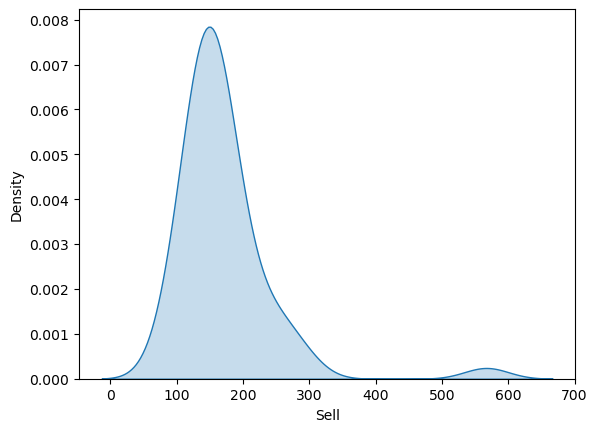

In [96]:
trimmed = df[df.Sell < 1e7].copy()
trimmed.describe()
sb.kdeplot(trimmed['Sell'], fill=True)


This visualization is a Kernel Density Estimation (KDE) plot for the "Sell" column, representing the selling price of houses. It provides insight into the distribution of home prices in the dataset. The plot reveals a peak around 150K, indicating that most homes sell at this price point. The distribution is right-skewed, meaning that while the majority of homes sell for lower prices, a few high-priced properties create a long tail, suggesting the presence of potential outliers. Additionally, there is a small secondary bump near $600K, which could indicate a distinct subgroup of high-value properties within the dataset.

Note: Outliers can distort analysis, so I removed extremely high prices to focus on meaningful trends.
Also, the KDE plot helps me see how selling prices are spread across different price ranges.

If the distribution is skewed, it suggests an uneven spread of property prices, which can affect future modeling.home prices.



In [27]:
df.nunique()

Sell         42
 "List"      32
 "Living"    20
 "Rooms"      8
 "Beds"       4
 "Baths"      4
 "Age"       34
 "Acres"     37
 "Taxes"     49
dtype: int64

In [108]:
corr = trimmed.corr()
corr['Sell'].sort_values(ascending=False)


Sell         1.000000
 "List"      0.997433
 "Taxes"     0.899339
 "Living"    0.879381
 "Baths"     0.640059
 "Rooms"     0.560425
 "Beds"      0.335113
 "Acres"     0.168713
 "Age"      -0.147343
Name: Sell, dtype: float64

What am I doing?
To understand which factors influence home prices the most, I computed the correlation between the selling price (Sell) and other numerical variables in the dataset. Instead of looking at the full correlation matrix, I specifically sorted the correlations with Sell in descending order to highlight the strongest and weakest relationships.

Why am I doing it?
Correlation analysis helps identify which home attributes drive price variations. This insight is useful for understanding market trends, pricing strategies, and predictive modeling. High correlation values indicate strong relationships, while weak or negative correlations suggest that a factor has little to no impact on home prices.

Results & Interpretation
Listing Price (List) has the highest correlation (0.997), which makes sense because homes generally sell close to their listed prices.
Taxes (Taxes) show a strong correlation (0.899) with selling price, meaning that higher-priced homes tend to have higher property taxes.
Living Space (Living) is highly correlated (0.879) with price, confirming that larger homes sell for more.
Bathrooms (Baths) and Total Rooms (Rooms) have moderate correlations (0.640 and 0.560, respectively), indicating that while these factors contribute to pricing, they are not as influential as overall square footage.
Bedrooms (Beds) have a weaker correlation (0.335), suggesting that the number of bedrooms alone doesn’t significantly impact price, it’s likely that overall home size matters more.
Lot Size (Acres) has a low correlation (0.168), meaning that the amount of land doesn’t strongly influence home prices (possibly due to the dataset including many urban properties where land size is less important).
Home Age (Age) has a negative correlation (-0.147), meaning older homes tend to sell for slightly less, which aligns with expectations since newer homes often have modern features and lower maintenance costs.

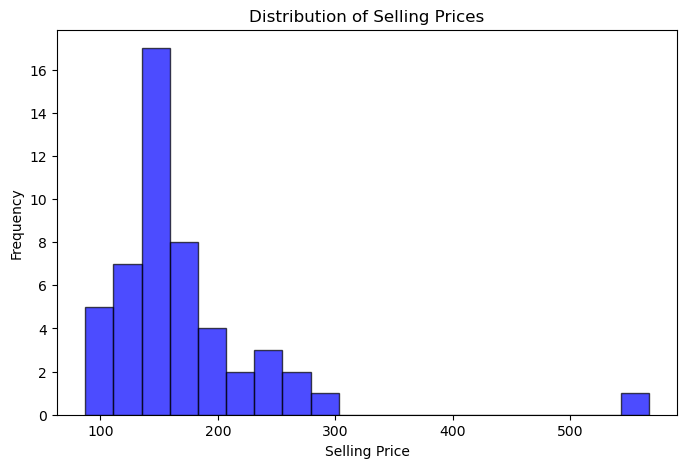

In [30]:
import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8, 5))
plt.hist(df["Sell"], bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

What am I doing?
To better understand the distribution of home selling prices, I created a histogram using Matplotlib. The histogram groups selling prices into bins and shows how frequently different price ranges occur. 

Why am I doing it?
A histogram is useful for identifying how prices are distributed, whether they are skewed, and whether there are outliers or unusual patterns in the data. This helps us determine the typical price range for homes and whether extreme values exist that could impact analysis.

Results & Interpretation
The histogram reveals that most homes sell within the 100K–200K range, with a peak around 150K.
The distribution is right-skewed, meaning that while most homes sell at lower prices, a few properties have significantly higher selling prices.
There are a few extreme outliers above $500K, suggesting the presence of luxury homes that are much more expensive than the typical properties.

The presence of outliers suggests that further analysis such as boxplots may be needed to handle price variability in predictive modeling.


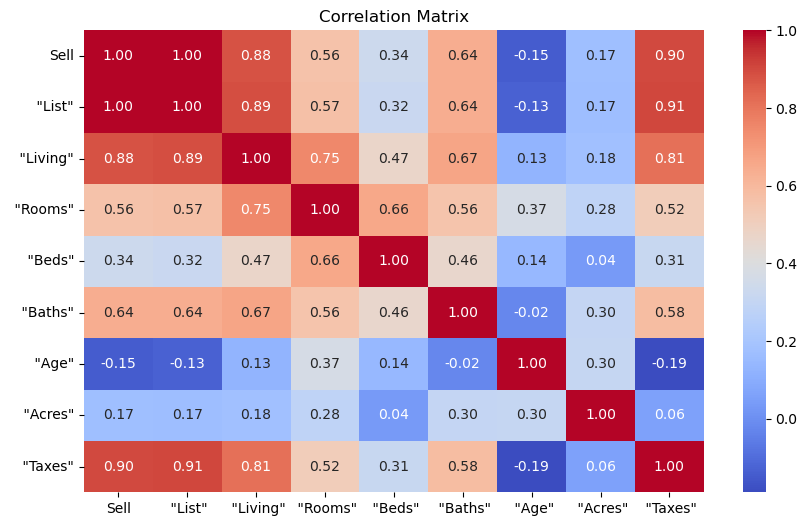

In [33]:
import seaborn as sns

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Here I am creating a correlation heatmap to see how each variable is related to Sell (Selling Price). 
This visualization helps identify which factors have the strongest and weakest relationships with selling price (Sell). The colors range from red (strong positive correlation) to blue (negative correlation), making it easy to spot important patterns.

Listing Price, Living Space, and Property Taxes are the strongest predictors of home prices, while Lot Size (Acres) and Home Age have much weaker influences. 

In [44]:
print(df.columns)


Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')


In [58]:
df.columns = df.columns.str.replace('"', '').str.strip()


In [62]:
import statsmodels.api as sm

# Ensure column names are clean
df.columns = df.columns.str.replace('"', '').str.strip()

# Define independent and dependent variables
X = df[['Taxes']]
y = df['Sell']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        19:14:12   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

To understand whether property taxes (Taxes) are a strong predictor of home selling price (Sell), I analyzed the regression output and found several important insights. The R-squared value of 0.809 indicates that approximately 80.9% of the variation in selling price is explained by Taxes, suggesting that Taxes play a significant role in determining home prices. The coefficient for Taxes is 0.0414, meaning that for every 1-unit increase in Taxes, the selling price increases by 0.0414 units. This positive coefficient confirms that there is a direct relationship between higher Taxes and higher Selling Prices.

The p-value for Taxes is 0.000, which is extremely low and confirms that the relationship between Taxes and Selling Price is statistically significant. Since the p-value is below the 0.05 threshold, I can confidently reject the null hypothesis and conclude that Taxes have a meaningful impact on selling price. The intercept (constant) of 16.8719 represents the expected selling price when Taxes are zero. While this is not realistic in a real-world scenario, as property taxes typically do not reach zero, it is part of the regression equation. Additionally, the F-statistic of 203.1 with a corresponding p-value of 7.22e-19 further supports that the overall model is highly significant.

Although Taxes appear to be a strong predictor, there are some concerns regarding the model’s stability. The condition number of 1.03e+04 suggests possible multicollinearity, which means that Taxes might be correlated with another variable, such as Living Space or Listing Price. If another factor strongly influences both Taxes and Selling Price, the model may not be fully reliable when using Taxes alone as the predictor.e.g., Living) is important.



In [65]:
import statsmodels.api as sm

# Define independent and dependent variables
X_new = df[['Living']]  # Using 'Living' as the independent variable
y = df['Sell']          # Selling price remains the dependent variable

# Add a constant (intercept) to the model
X_new = sm.add_constant(X_new)

# Fit the regression model
model_new = sm.OLS(y, X_new).fit()

# Display the summary of the new model
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           4.39e-17
Time:                        19:27:43   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

Comparing Two Regression Models: "Taxes" vs. "Living"

I ran two regression models to see which variable, Taxes or Living, is a better predictor of selling price (Sell). Here’s what I found:

Model 1: Taxes as the Predictor
- R-squared = 0.809 → Taxes explains 80.9% of the variation in selling price.
- p-value = 0.000 →  This means Taxes is statistically significant.
- Condition Number = 1.03e+04** → This is really high, which suggests possible multicollinearity (not great).
- Takeaway: Taxes is a strong predictor, but the model might be unstable.

Model 2: Living as the Predictor
- R-squared = 0.773 → Living explains 77.3% of the variation in selling price (a little less than Taxes).
- p-value = 0.000 → Living is also statistically significant.
- Condition Number = 62.3 → Much lower, which means this model is more stable and doesn't have multicollinearity issues.
- Takeaway: Living is also a strong predictor, and the model is more reliable.

Which Model is Better?
- If I just look at R-squared, Taxes is the better predictor since it explains more of the selling price variation.
- But since the condition number is really high, it means Taxes might be related to other factors, making the model unstable.
- Living is a slightly weaker predictor but has a more stable model.

Limitations & Next Steps
- These models only look at one variable at a time. A better approach might be a multiple regression using both Taxes and Living.
- There could be other variables*(like List Price or Acres) that predict Sell better.
- The model assumes a linear relationship, which may not always be true in real estate.

What I would do...
- Try a multiple regression model with Taxes and Living together
- Look at other predictors like List to see if they add more value
- Check if multicollinearity is still an issue in a combined model
